# Evaluate Model Performance

Some model evaluation was completed alongside training the model in `03_Build_and_Train_Model.ipynb`, I will not repeat this here. This reviews the over all performance of the model using some visualisations and assess if there are any easy optimisation wins left on the table

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

First lets load up our training dataset

In [35]:
df = pd.read_csv(f'data/forecast_data_cleaned_feature_engineered_with_prediction_best_model.csv')
df['date'] = pd.to_datetime(df['date'])

In [36]:
n = len(df)
test_end = int(n * 0.15)
val_end = test_end + int(n * 0.15)

df = df[:test_end]

In [87]:
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')

# Create list to store all line segments (hairs)

filtered_indices = df[df['date'].dt.hour.isin([9,15, 21, 3])].index # hairs from 9am then every 6 hours


hairs = []
for i in filtered_indices:
    base_time = df.loc[i, 'date']
    base_power = df.loc[i, 'power_x']

    # Start a list to hold the points for *this* hair
    hair_points = [(base_time, base_power)]  # Start with the base point

    for h in range(1,7):
        if i + h < len(df):
            future_time = df.loc[i + h, 'date']
            pred_power = df.loc[i, f'pred_{h}h']
            
            # Add the forecast point to the current hair's points
            hair_points.append((future_time, pred_power))

    hairs.append(hv.Curve(hair_points).opts(line_width=1.5, alpha=0.6, color='magenta'))


# Plot power_x as a continuous line
power_curve = hv.Curve((df['date'], df['power_x']), label="Actual Power_x").opts(
    line_width=2, color="black", alpha = 0.9, ylim = (-10,6000)
)

# Overlay actual power line and "hairs"
hairy_plot = (hv.Overlay(hairs) * power_curve).opts(
    title="Hairy Plot: Power_x vs Predictions",
    xlabel="Time",
    ylabel="Power",
    width=900,
    height=300,
    legend_position="right"
)

hairy_plot

:Overlay
   .Curve.I              :Curve   [x]   (y)
   .Curve.II             :Curve   [x]   (y)
   .Curve.III            :Curve   [x]   (y)
   .Curve.IV             :Curve   [x]   (y)
   .Curve.V              :Curve   [x]   (y)
   .Curve.VI             :Curve   [x]   (y)
   .Curve.VII            :Curve   [x]   (y)
   .Curve.VIII           :Curve   [x]   (y)
   .Curve.IX             :Curve   [x]   (y)
   .Curve.X              :Curve   [x]   (y)
   .Curve.XI             :Curve   [x]   (y)
   .Curve.XII            :Curve   [x]   (y)
   .Curve.XIII           :Curve   [x]   (y)
   .Curve.XIV            :Curve   [x]   (y)
   .Curve.XV             :Curve   [x]   (y)
   .Curve.XVI            :Curve   [x]   (y)
   .Curve.XVII           :Curve   [x]   (y)
   .Curve.XVIII          :Curve   [x]   (y)
   .Curve.XIX            :Curve   [x]   (y)
   .Curve.XX             :Curve   [x]   (y)
   .Curve.XXI            :Curve   [x]   (y)
   .Curve.XXII           :Curve   [x]   (y)
   .Curve.XXIII          :Curve   [x]   (y)
   .Curve.XXIV           :Curve   [x]   (y)
   .Curve.XXV            :Curve   [x]   (y)
   .Curve.XXVI           :Curve   [x]   (y)
   .Curve.XXVII          :Curve   [x]   (y)
   .Curve.XXVIII         :Curve   [x]   (y)
   .Curve.XXIX           :Curve   [x]   (y)
   .Curve.XXX            :Curve   [x]   (y)
   .Curve.XXXI           :Curve   [x]   (y)
   .Curve.XXXII          :Curve   [x]   (y)
   .Curve.XXXIII         :Curve   [x]   (y)
   .Curve.XXXIV          :Curve   [x]   (y)
   .Curve.XXXV           :Curve   [x]   (y)
   .Curve.XXXVI          :Curve   [x]   (y)
   .Curve.XXXVII         :Curve   [x]   (y)
   .Curve.XXXVIII        :Curve   [x]   (y)
   .Curve.XXXIX          :Curve   [x]   (y)
   .Curve.XL             :Curve   [x]   (y)
   .Curve.XLI            :Curve   [x]   (y)
   .Curve.XLII           :Curve   [x]   (y)
   .Curve.XLIII          :Curve   [x]   (y)
   .Curve.XLIV           :Curve   [x]   (y)
   .Curve.XLV            :Curve   [x]   (y)
   .Curve.XLVI           :Curve   [x]   (y)
   .Curve.XLVII          :Curve   [x]   (y)
   .Curve.XLVIII         :Curve   [x]   (y)
   .Curve.XLIX           :Curve   [x]   (y)
   .Curve.L              :Curve   [x]   (y)
   .Curve.LI             :Curve   [x]   (y)
   .Curve.LII            :Curve   [x]   (y)
   .Curve.LIII           :Curve   [x]   (y)
   .Curve.LIV            :Curve   [x]   (y)
   .Curve.LV             :Curve   [x]   (y)
   .Curve.LVI            :Curve   [x]   (y)
   .Curve.LVII           :Curve   [x]   (y)
   .Curve.LVIII          :Curve   [x]   (y)
   .Curve.LIX            :Curve   [x]   (y)
   .Curve.LX             :Curve   [x]   (y)
   .Curve.LXI            :Curve   [x]   (y)
   .Curve.Actual_Power_x :Curve   [x]   (y)

So in the above purple are our predictions made every 6 hours and black is the actual observed power output. Inspired by the now famous hairy plots showing interest rate predicitons :)

I guess no clear takeaways from the above other than that our model does an okay job but certainly still making significant mistakes, particulalry at the extremes. 

One immediately obvious factor is we are often forecasting negative values which clearly makes no sense. A simple step to reset these to 0 will add some value. Similarly clipping values above 5500 (which appears to be the plants maximum output) would also help.

In [93]:
min_val, max_val = 0, 5500

for h in range(1, 7):
    df[f'clipped_pred_{h}h'] = df[f'pred_{h}h'].clip(min_val, max_val)

In [97]:
mae_before_clipping = {}
mae_after_clipping = {}
for h in range(1, 7):
    mae_before_clipping[h] = mean_absolute_error(df['power_x'], df[f'pred_{h}h'])
    mae_after_clipping[h] = mean_absolute_error(df['power_x'], df[f'clipped_pred_{h}h'])

for h in range(1, 7):
    print(f'\nForecast hour: {h}')
    print(f"MAE Before Clipping {mae_before_clipping[h]:.0f} after: {mae_after_clipping[h]:.0f}")



Forecast hour: 1
MAE Before Clipping 1159 after: 1121

Forecast hour: 2
MAE Before Clipping 988 after: 956

Forecast hour: 3
MAE Before Clipping 1091 after: 1063

Forecast hour: 4
MAE Before Clipping 1261 after: 1256

Forecast hour: 5
MAE Before Clipping 1318 after: 1314

Forecast hour: 6
MAE Before Clipping 1376 after: 1363


Text(0.5, 1.0, 'Power output histogram')

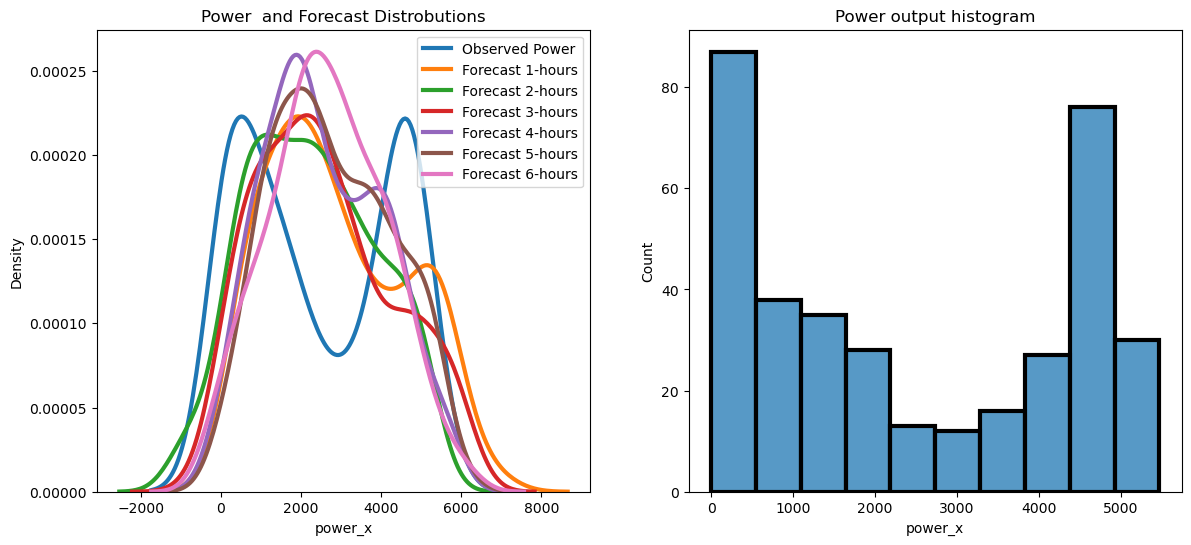

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
ax = axes[0]
sns.kdeplot(df['power_x'], label="Observed Power", ax=ax, lw = 3)
for h in range(1,7):
    sns.kdeplot(df[f'pred_{h}h'], label=f"Forecast {h}-hours", ax=ax, lw = 3)
ax.set_title('Power  and Forecast Distrobutions')
ax.legend()

ax = axes[1]
sns.histplot(df['power_x'], label="Observed Power", ax=ax, lw = 3)
ax.set_title('Power output histogram')


Of interest is the bimodal nature of the plant in the above plot, indicating curtailment of some nature. In hindsight perhaps forecasting a theoretical available power by predicting wind speed and directions at multiple levels before feeding that into a secondry model would be more effective. 